In [4]:
import os
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Results from grid search with small dataset

In [2]:
models_root = "../output_small"
results = []

for dir in os.listdir(models_root):
    # Check for the existence of config.json and metrics.json
    config_path = os.path.join(models_root, dir, "config.json")
    metrics_path = os.path.join(models_root, dir, "metrics.json")
    if not os.path.exists(config_path) or not os.path.exists(metrics_path):
        continue
    else:
        with open(config_path, "r") as f:
            config = json.load(f)
        with open(metrics_path, "r") as f:
            metrics = json.load(f)
        res = {}
        res.update(config)
        res.update(metrics)
        res["model_dir"] = dir.split("/")[-1]
        results.append(res)
    
res_df = pd.DataFrame(results).drop(columns=["output_dir", "data_path", "device", "verbose"])
print("{} models found".format(len(res_df)))

36 models found


In [3]:
# Delete duplicates keeping the one with highest MAP@15
res_df = res_df.sort_values("map@15", ascending=False).drop_duplicates(["num_conv_layers", "hidden_channels", "use_embedding_layers", "num_decoder_layers", "num_epochs", "lr", "loss", "encoder_arch"])
print("{} models after removing duplicates".format(len(res_df)))

36 models after removing duplicates


In [5]:
# Remove models trained with nll (worse results)
res_df = res_df[res_df["loss"] != "nll"]
res_df

,num_conv_layers,hidden_channels,use_embedding_layers,num_decoder_layers,num_epochs,validation_steps,lr,loss,encoder_arch,best_epoch,precision@5,recall@5,f1@5,map@15,model_dir
11,2,256,False,3,7500,500,0.0010,mse,SAGE,1999,0.635393,0.407135,0.482045,0.634503,model_20240608_103359
24,2,512,False,3,7500,500,0.0010,mse,SAGE,1499,0.623945,0.397264,0.471551,0.622517,model_20240608_114135
5,2,512,False,3,7500,500,0.0001,mse,SAGE,5999,0.617776,0.394064,0.467345,0.618083,model_20240608_115612
18,2,256,False,3,7500,500,0.0005,mse,SAGE,7499,0.612273,0.393241,0.465012,0.611331,model_20240608_103717
20,4,256,False,3,7500,500,0.0010,mse,SAGE,2499,0.614602,0.514578,0.604822,0.607558,model_20240608_110343
2,4,128,False,3,7500,500,0.0010,mse,SAGE,4999,0.602910,0.383917,0.455613,0.601035,model_20240608_100918
21,2,512,False,3,7500,500,0.0005,mse,SAGE,3999,0.583975,0.371628,0.441166,0.581749,model_20240608_114927
12,4,128,False,3,7500,500,0.0010,mse,GAT,2999,0.574037,0.370390,0.437052,0.573915,model_20240608_102037
10,4,128,False,3,7500,500,0.0005,mse,SAGE,2999,0.574737,0.362519,0.431873,0.572016,model_20240608_101050
22,4,512,False,3,7500,500,0.0010,mse,SAGE,4499,0.574662,0.363974,0.432725,0.571323,model_20240608_124030


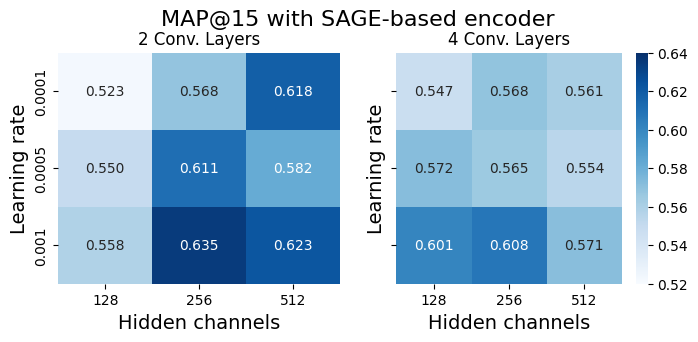

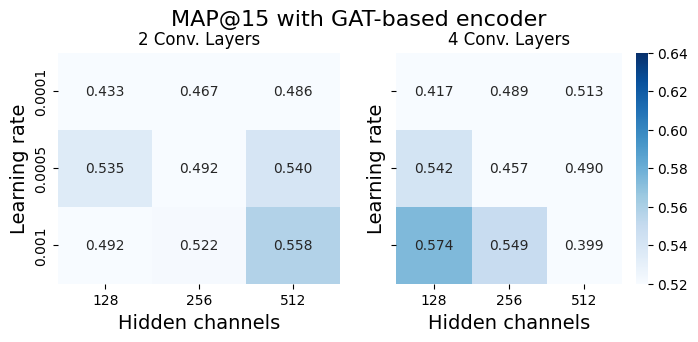

In [16]:
for encoder_arch in res_df["encoder_arch"].unique():
    n_cols = len(res_df["num_conv_layers"].unique())
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 3), sharex=True, sharey=True)
    
    for i, ax, num_conv_layers in zip(range(len(axs)), axs, sorted(res_df["num_conv_layers"].unique())):
        tmp_df = res_df[(res_df["encoder_arch"] == encoder_arch) & (res_df["num_conv_layers"] == num_conv_layers)]
        sns.heatmap(
            tmp_df.pivot(columns="hidden_channels", index="lr", values="map@15"),
            annot=True,
            fmt=".3f",
            ax=ax,
            cmap="Blues",
            vmax=0.64,
            vmin=0.52,
            cbar=False if i < n_cols - 1 else True,
        )
        ax.set_title(f"{num_conv_layers} Conv. Layers")
        ax.set_xlabel("Hidden channels", fontsize=14)
        ax.set_ylabel("Learning rate", fontsize=14)
    
    fig.suptitle(f"MAP@15 with {encoder_arch}-based encoder", fontsize=16, y=1.025)
    fig.savefig(f"./plots/{encoder_arch}_heatmap.pdf", bbox_inches="tight")

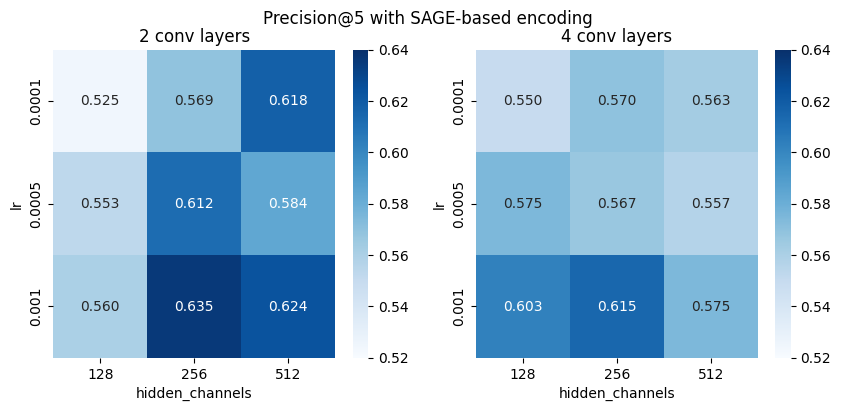

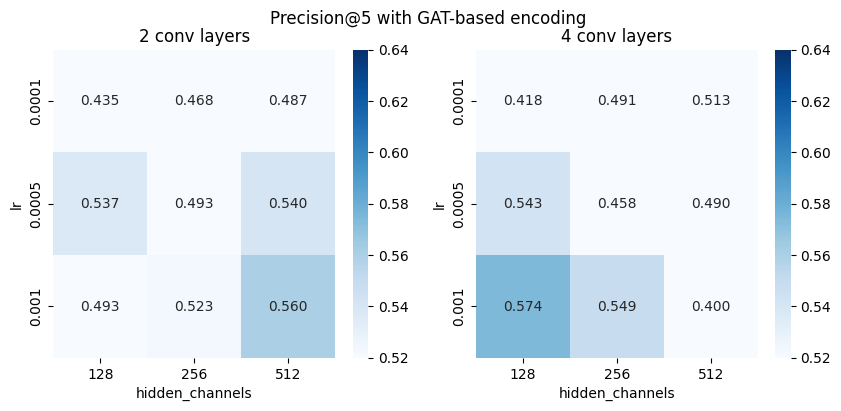

In [7]:
for encoder_arch in res_df["encoder_arch"].unique():
    n_cols = len(res_df["num_conv_layers"].unique())
    fig, axs = plt.subplots(1, n_cols, figsize=(5 * n_cols, 4))
    
    for ax, num_conv_layers in zip(axs, res_df["num_conv_layers"].unique()):
        tmp_df = res_df[(res_df["encoder_arch"] == encoder_arch) & (res_df["num_conv_layers"] == num_conv_layers)]
        sns.heatmap(
            tmp_df.pivot(columns="hidden_channels", index="lr", values="precision@5"),
            annot=True,
            fmt=".3f",
            ax=ax,
            cmap="Blues",
            vmax=0.64,
            vmin=0.52,
        )
        ax.set_title(f"{num_conv_layers} conv layers")
    
    fig.suptitle(f"Precision@5 with {encoder_arch}-based encoding")
        
        

## Final experiments results

In [15]:
# Load results
base_models_root = "../output"
kg_models_root = "../output_kg"


In [16]:
results = []

for models_root in [base_models_root, kg_models_root]:
    for dir in os.listdir(models_root):
        # Check for the existence of config.json and metrics.json
        config_path = os.path.join(models_root, dir, "config.json")
        for metrics_filename in ["metrics_best.json", "metrics_last.json"]:
            metrics_path = os.path.join(models_root, dir, metrics_filename)
            if not os.path.exists(config_path) or not os.path.exists(metrics_path):
                continue
            else:
                with open(config_path, "r") as f:
                    config = json.load(f)
                with open(metrics_path, "r") as f:
                    metrics = json.load(f)
                res = {}
                res.update(config)
                res.update(metrics)
                res["model_dir"] = dir.split("/")[-1]
                res["is_best_on_val"] = True if metrics_filename == "metrics_best.json" else False
                results.append(res)
    
res_df = pd.DataFrame(results).drop(columns=["num_decoder_layers", "use_embedding_layers", "device", "verbose", "loss", "num_neighbors_in_sampling"])
print("{} models found".format(len(res_df)))

6 models found


In [17]:
res_df

,data_path,output_dir,num_conv_layers,hidden_channels,sampler_type,batch_size,num_epochs,validation_steps,lr,encoder_arch,best_step,precision@5,recall@5,f1@5,map@15,model_dir,is_best_on_val
0,./data/splitted_data,./output,2,256,link-neighbor,8192,20,-2,0.00025,SAGE,6020,0.515625,0.321215,0.384051,0.514055,model_20240609_204202,True
1,./data/splitted_data,./output,2,256,link-neighbor,8192,20,-2,0.00025,SAGE,6020,0.491243,0.305568,0.365501,0.488648,model_20240609_204202,False
2,./data/splitted_data,./output,2,256,link-neighbor,8192,30,-2,0.00025,SAGE,6020,0.552486,0.347199,0.413797,0.550823,model_20240609_234838,True
3,./data/splitted_data,./output,2,256,link-neighbor,8192,30,-2,0.00025,SAGE,6020,0.540236,0.340301,0.405154,0.537424,model_20240609_234838,False
4,./data/splitted_data_kg,./output_kg,4,256,link-neighbor,8192,30,-2,0.00025,SAGE,8428,0.543481,0.343337,0.408289,0.540338,model_20240610_022248,True
5,./data/splitted_data_kg,./output_kg,4,256,link-neighbor,8192,20,-2,0.00025,SAGE,3612,0.595619,0.379677,0.450071,0.593273,model_20240609_222058,True


In [20]:
# Show best models for each data_path, selecting on MAP@15
res_df[res_df.groupby("data_path")["map@15"].transform(max) == res_df["map@15"]][["data_path", "num_conv_layers", "map@15", "precision@5", "recall@5", "f1@5"]]

/tmp/ipykernel_2950722/1018285003.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  res_df[res_df.groupby("data_path")["map@15"].transform(max) == res_df["map@15"]][["data_path", "num_conv_layers", "map@15", "precision@5", "recall@5", "f1@5"]]


,data_path,num_conv_layers,map@15,precision@5,recall@5,f1@5
2,./data/splitted_data,2,0.550823,0.552486,0.347199,0.413797
5,./data/splitted_data_kg,4,0.593273,0.595619,0.379677,0.450071
